**Интерполяция и численное интегрирование. Формула ошибок**

Постройте $11$ точек, взяв$$
x_i = \frac{i-1}{10}, \quad y_i = {\rm erf} x_i\quad (i=1,\dots,11),
$$где$$
{\rm erf} x = \frac{2}{\sqrt{\pi}} \int_0^x e^{-t^2} dt
$$– функция ошибок. Для вычисления ${\rm erf}   x$ воспользуйтесь scipy.special.erf.

Составьте систему линейных уравнений для нахождения коэффициентов интерполирующего многочлена $10$-й степени. С помощью функции scipy.linalg.cond найдите число обусловленности этой системы. Решите составленную систему. Насколько достоверно полученное решение? С помощью построенного интерполянта протабулируйте значение функции в промежуточных точках. Чему равны абсолютная и относительная ошибки?
Сравните коэффициенты построенного интерполирующего многочлена с коэффициентами многочлена, который можно получить с помощью функции numpy.polyfit. В чем разница?

Постройте кубический эрмитов интерполянт (scipy.interpolate.pchip) и кубический сплайн (scipy.interpolate.spline). Найдите значения интерполянтов в тех же точках, что и в предыдущих пунктах и сравните результаты.

Составленная программа должна выводить исходные точки, графики интерполируемой функции и интерполянтов и графики зависимости числа обусловленности от степени интерполяционного многочлена

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import special
from scipy import linalg
from scipy import interpolate
%matplotlib inline

In [ ]:
x=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
y=scipy.special.erf(x)
for i in range(0,11):
  print(x[i],y[i])

0.0 0.0
0.1 0.1124629160182849
0.2 0.22270258921047845
0.3 0.3286267594591274
0.4 0.42839235504666845
0.5 0.5204998778130465
0.6 0.6038560908479258
0.7 0.6778011938374183
0.8 0.7421009647076605
0.9 0.7969082124228322
1.0 0.8427007929497148


Построим исходные точки:

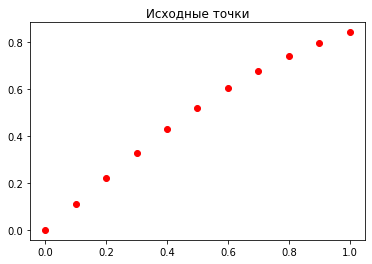

In [ ]:
plt.title('Исходные точки')
plt.plot(x,y,'ro')
pass

Составим систему линейных уравнений для нахождения коэффициентов интерполирующего многочлена  10-й степени c помощью матрицы Вандермонда (np.vander)

 Решим составленную систему (функция scipy.linalg.solve):

In [ ]:
W = np.vander(x)
res=scipy.linalg.solve(W,y)
res

array([-1.46537037e-03,  5.41662270e-03,  2.13905314e-03, -2.99669744e-02,
        2.22912462e-03,  1.11876424e-01,  2.56838187e-04, -3.76167525e-01,
        3.55779444e-06,  1.12837904e+00,  0.00000000e+00])

Коэффициенты многочлена записываются в порядке убывания степени


Выберем 20 промежуточных точек (включая начальную и конечную точки):

In [ ]:
xx = np.linspace(0.0, 1.0,20)
xx

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

И посчитаем значения в этих точках:

In [ ]:
yy = scipy.special.erf(xx)
yy

array([0.        , 0.05933359, 0.11833951, 0.17669554, 0.23409012,
       0.29022736, 0.3448316 , 0.39765138, 0.44846286, 0.49707249,
       0.54331887, 0.58707392, 0.62824324, 0.66676572, 0.70261247,
       0.73578515, 0.76631371, 0.79425374, 0.81968353, 0.84270079])

Напишем функцию linalg.cond для нахождения числа обусловленности системы, пользуясь тем, что числом обусловленности невырожденной матрицы $A$ называется величина$$
{\rm cond} A =  \| A \| \cdot \| A^{-1} \|.
$$
Найдем число обусловленности нашей системы:

In [ ]:
def cond(A, p=2):
    return linalg.norm(A, p)*linalg.norm(linalg.inv(A), p)

cond(W)

115575244.55218327

Число обсуловленности можно рассматривать как меру близости матрицы к вырожденной. Чем больше число обусловленности, тем матрица ближе к вырожденной.

Найдем абсолютную и относительную ошибки.

Абсолютная ошибка:
$$
   \|\Delta x\| = \|\widetilde{x} - x\|,
$$
Относительная ошибка:
$$
   \frac{\|\Delta x\|}{\|x\|} = \frac{\|\widetilde{x} - x\|}{\|x\|}
$$
где $x$ – некоторый вектор в ${\bf R}^n$, а $\widetilde{x}$ – другой вектор в ${\bf R}^n$, рассматриваемый как приближение к $x$.

In [ ]:
print("Абсолютная ошибка:", linalg.norm(W@res-y))
print("Относительная ошибка:", linalg.norm(W@res-y)/linalg.norm(y))

Абсолютная ошибка: 1.576213700060856e-16
Относительная ошибка: 8.618650116161458e-17


Коэффициенты интерполяционного многочлена также можно найти с помощью функции f = np.polyfit:

In [ ]:
f = np.polyfit(x,y,10)
f

array([-1.46537046e-03,  5.41662313e-03,  2.13905224e-03, -2.99669733e-02,
        2.22912389e-03,  1.11876424e-01,  2.56838097e-04, -3.76167525e-01,
        3.55779306e-06,  1.12837904e+00, -3.20950468e-16])

Сравнивая коэффициенты, полученные двумя способами, видим различие только в последнем коэффициенте. Остальные либо совпадают, либо имеют несущественное различие.


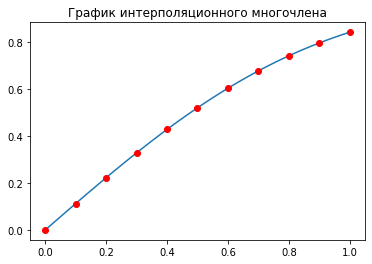

In [ ]:
xx = np.linspace(0.0, 1.0,100)
plt.title('График интерполяционного многочлена')
plt.plot(xx, np.polyval(f, xx),color = 'tab:blue')
plt.plot(x, y, 'or')
pass

Построим кубический эрмитов интерполянт (scipy.interpolate.pchip):

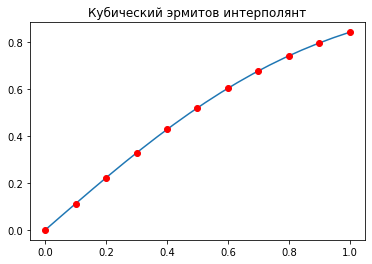

In [ ]:
f = scipy.interpolate.pchip(x,y)
xx = np.linspace(0.0, 1.0,20)
yy = f(xx)
plt.title('Кубический эрмитов интерполянт')
plt.plot(xx, yy, color = 'tab:blue')
plt.plot(x, y, 'or', color = 'red')
pass

Найдем значения интерполянта в тех же 20 промежуточных точках:

In [ ]:
yy

array([0.        , 0.0594696 , 0.11832277, 0.17670944, 0.23406215,
       0.29024943, 0.34479728, 0.3976799 , 0.44842653, 0.49710501,
       0.54328421, 0.58710726, 0.62821322, 0.6667962 , 0.70258918,
       0.73580888, 0.76629823, 0.79426708, 0.81967015, 0.84270079])

Построим кубический сплайн (scipy.interpolate.CubicSpline):

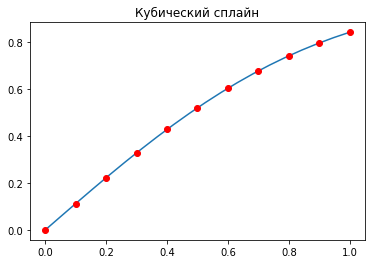

In [ ]:
f = scipy.interpolate.CubicSpline(x,y)
xx = np.linspace(0.0, 1.0,20)
yy = f(xx)
plt.title('Кубический сплайн')
plt.plot(xx, yy, color = 'tab:blue')
plt.plot(x, y, 'or', color = 'red')
pass

Найдем значения интерполянта в тех же 20 промежуточных точках:

In [ ]:
yy

array([0.        , 0.05933708, 0.11833915, 0.17669417, 0.23409011,
       0.2902269 , 0.34483122, 0.39765058, 0.44846235, 0.49707181,
       0.54331818, 0.58707342, 0.62824234, 0.66676528, 0.70261207,
       0.73578527, 0.76631131, 0.79425312, 0.81968986, 0.84270079])

Значения интерполянтов в промежуточных точках различаются, хоть и не очень сильно. Однако при увеличении значений точек, разница становится существеннее.

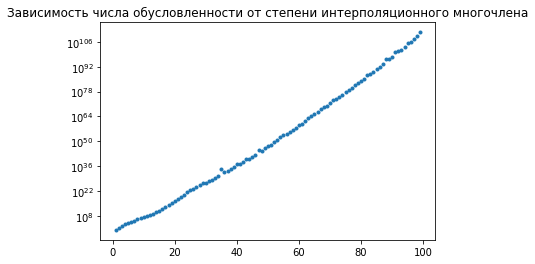

In [ ]:
n_vector = []
for i in range(1,100):
  n_vector.append(i)
cond_array = []
for n in n_vector:
    _x=[]
    for i in range(0,n):
      _x+=[(i-1)/10]
    W = np.vander(_x)
    c = cond(W)
    cond_array.append(c)
plt.semilogy(n_vector, cond_array, '.')
plt.title('Зависимость числа обусловленности от степени интерполяционного многочлена')
pass